
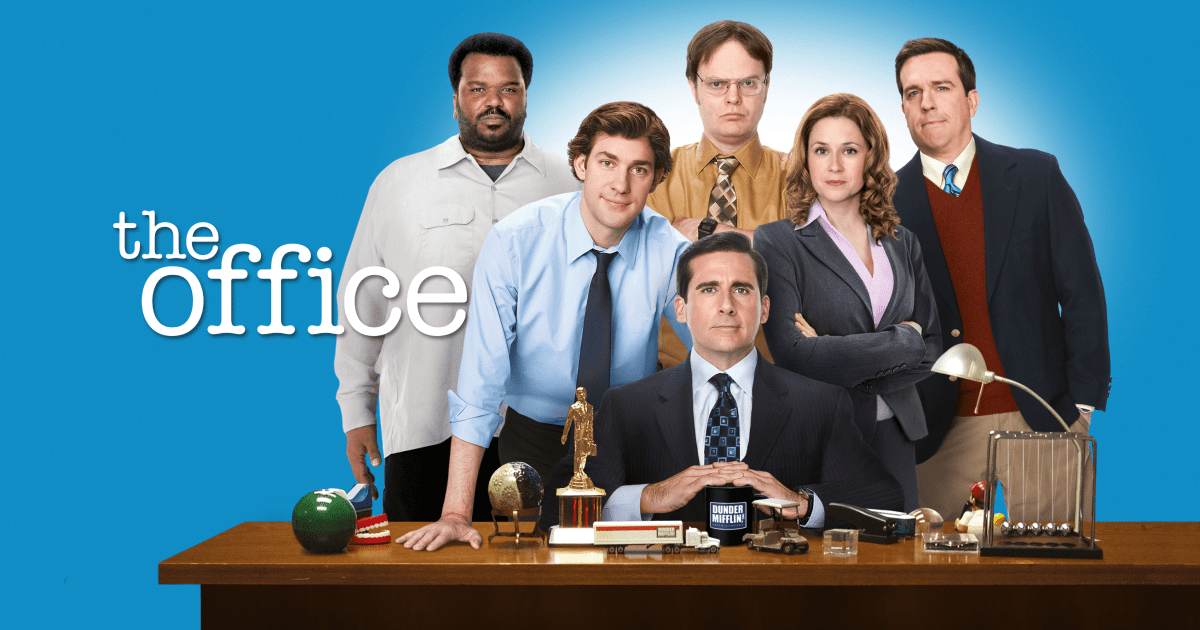



# Introduction 



The Office is a television series that depicts the everyday lives of office employees in the fictional Scranton office of Dunder Mifflin Paper Company. There have been nine seasons of the show, which aired from March 24, 2005, to May 16, 2013.
This notebook investigates the popularity and quality of the Office episodes over time by examining the datasets/office_episodes.csv, which was obtained from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>




In this dataset, you can find information about multiple characteristics of each episode. This includes the following:

<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>




 This project aims to:
 
 
 1 - Create a scatter plot for the purpose of exploring data and uncovering insights
 
 2 - Find out which stars appeared in the  most viewed episode 
 
 

# libraries and data importing 

In [15]:

# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 7]
%matplotlib inline

In [16]:
# Load your data and print out a few lines.
# Read the CSV File Using Pandas read_csv function
office_df=pd.read_csv('datasets/office_episodes.csv')

# print the concise summery of the dataset
office_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB



From this  dataset, we can observe that 29 guests appeared in 188 episodes. 

# Data visualization : 
## 1-Simple scatter plot : 
Here is a simple scatter plot where episode number is plotted along the x-axis and viewership is plotted along the y-axis as follows


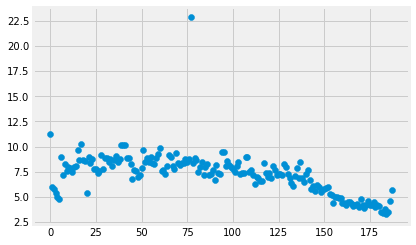

In [18]:
fig= plt.figure()

plt.scatter(x=office_df['episode_number'], y= office_df['viewership_mil'])


The scatter plot indicates that the first few episodes of the show did not have the highest viewership, but popularity picked up as the season progressed and declined later in the season. 

 The scatter plot is difficult to read.  Therefore, we should develop a more sophisticated scatter plot. 

## 2-Advanced scatter plot : 

We are going to add a color scheme to the previous scatter  plot such that each point has a color associated with its rating based on the following:

Ratings < 0.25 are colored "red"

Ratings >= 0.25 and < 0.50 are colored "orange"

Ratings >= 0.50 and < 0.75 are colored "lightgreen"

Ratings >= 0.75 are colored "darkgreen"


This can be accomplished by creating an array of colors to customize the plot 

In [21]:
# Initiatlize an  empty list

cols=[]
# Iterate through the DataFrame, and assign colors based on the rating
for ind,row in office_df.iterrows():
    if row['scaled_ratings']<0.25: 
        cols.append('red')
    elif row['scaled_ratings']<0.50:
        cols.append('orange')
    elif row['scaled_ratings']< 0.75:
        cols.append("lightgreen")
    else:
        cols.append("darkgreen")
        

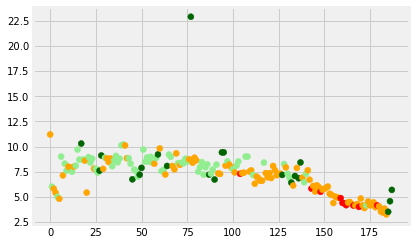

In [23]:
fig= plt.figure()

plt.scatter(x=office_df['episode_number'], y= office_df['viewership_mil'],c=cols)

Now each point in the scatter plot is colored according to the rating of each episode 

As a next step, we can add a sizing system such that episodes with guests have a marker size of 250 and episodes without guests have a marker size of 25. we can do this by using the same technique (by creating an array of sizes to customize the plot )

In [32]:
# Initiatlize an empty list
sizes=[]


for ind,row in office_df.iterrows():
    if row['has_guests']==True:
        sizes.append(250)
    else:
        sizes.append(25)
print(sizes.count(250))  

29


29


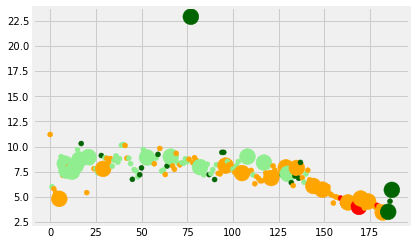

In [33]:
fig= plt.figure()

plt.scatter(x=office_df['episode_number'], y= office_df['viewership_mil'],c=cols,s=sizes)
print(sizes.count(250)) 

If we count the number of points that has a marker size of 250 or used (print(sizes.count(250)) ) we can find that 29 guests appeared in 188 episodes. This is in line with our earlier observations about guest appearances.

This scatter plot will be easier to read by providing labels for both axes and adding a title as follows:

29


Text(0, 0.5, 'Viewership (Millions)')

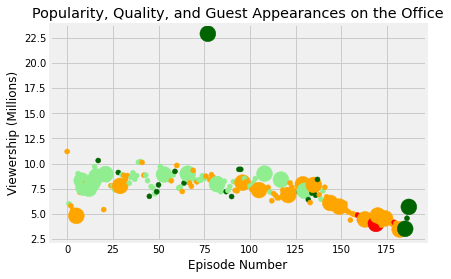

In [40]:
fig= plt.figure()

plt.scatter(x=office_df['episode_number'], y= office_df['viewership_mil'],c=cols,s=sizes)
print(sizes.count(250)) 

# Create a title
plt.title("Popularity, Quality, and Guest Appearances on the Office")

# Create an x-axis label
plt.xlabel("Episode Number")

# Create a y-axis label
plt.ylabel("Viewership (Millions)")

Aside from varying the marker size, we can also change the marker type to star to identify guest appearances 

This can be achieved by calling two scatter plots, one with guest appearance data and the other with non-guest appearance data, and changing the marker

In [36]:

# Adding our lists as columns to the DataFrame will make plotting much easier

office_df['colors']=cols
office_df['size']=sizes
# Split data into guest and non_guest DataFrames
non_guest_df=office_df[office_df['has_guests']==False]
guest_df=office_df[office_df['has_guests']==True]

Text(0, 0.5, 'Viewership (Millions)')

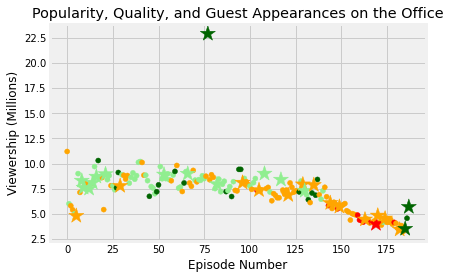

In [37]:
fig=plt.figure()
# Create two scatter plots with the episode number on the x axis, and the viewership on the y axis

# Create a normal scatter plot for regular episodes
plt.scatter(x=non_guest_df['episode_number'],
            y=non_guest_df['viewership_mil'],
            c=non_guest_df['colors'],
            s=non_guest_df['size'])
# Create a starred scatterplot for guest star episodes
plt.scatter(x=guest_df['episode_number'],
            y=guest_df['viewership_mil'],
            c=guest_df['colors'],
            s=guest_df['size'],
           marker='*')


# Create a title
plt.title("Popularity, Quality, and Guest Appearances on the Office")
# Create an x-axis label
plt.xlabel("Episode Number")
# Create an y-axis label
plt.ylabel("Viewership (Millions)")

 Finally, let's find out which stars appeared in the most viewed episode 

In [39]:
# Get the most popular guest star
print(office_df[office_df['viewership_mil'] > 20]['guest_stars'])


77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object
